In [1]:
%matplotlib inline

In [53]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
from shapely import wkt
import math
import copy
import numpy as np
from matplotlib import pyplot as plt

In [49]:
GRID_SIZE = 7

In [3]:
csv1_file = "data/test1_geojson.csv"
df = pd.read_csv(csv1_file)
df

,hexid,dayType,traversals,X,Y
0,8c283082e2561ff,weekday,1032,-122.402070,37.771452
1,8c283082e2569ff,weekday,892,-122.402131,37.771284
2,8c283082e2549ff,weekday,990,-122.402617,37.771018
3,8c283082e262bff,weekday,398,-122.404226,37.770340
4,8c283082e2633ff,weekday,416,-122.404677,37.770698
...,...,...,...,...,...
94,8c2830828da01ff,weekday,85,-122.407715,37.765075
95,8c2830828da0dff,weekday,130,-122.407564,37.764956
96,8c2830828da47ff,weekday,126,-122.407626,37.764788
97,8c2830828da45ff,weekday,166,-122.407476,37.764669


In [4]:
df['geometry'] = df.apply(lambda row: Point(row.X, row.Y), axis=1)

In [5]:
gdf = gpd.GeoDataFrame(df)

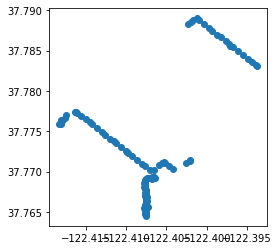

In [6]:
gdf.plot()

In [7]:
nybb = gpd.read_file(gpd.datasets.get_path('nybb'))
nybb

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


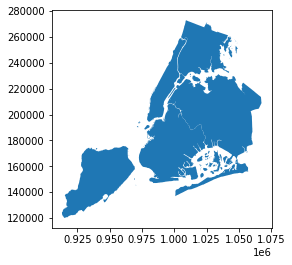

In [8]:
nybb.plot()

In [9]:
nybb["geometry"]

0    MULTIPOLYGON (((970217.022 145643.332, 970227....
1    MULTIPOLYGON (((1029606.077 156073.814, 102957...
2    MULTIPOLYGON (((1021176.479 151374.797, 102100...
3    MULTIPOLYGON (((981219.056 188655.316, 980940....
4    MULTIPOLYGON (((1012821.806 229228.265, 101278...
Name: geometry, dtype: geometry

In [11]:
# csv_file = "test_geojson.csv"
csv_file = "data/san_francisco-traversals.csv"
df = pd.read_csv(csv_file)
df

,hexid,dayType,traversals,geometry
0,8c283082e2561ff,weekday,1032,POLYGON ((-122.40206953427416 37.7714520565948...
1,8c283082e2569ff,weekday,892,POLYGON ((-122.40213131278361 37.7712839848525...
2,8c283082e2549ff,weekday,990,POLYGON ((-122.40261741706829 37.7710182076871...
3,8c283082e262bff,weekday,398,POLYGON ((-122.40422609029275 37.7703400835882...
4,8c283082e2633ff,weekday,416,POLYGON ((-122.40467724483703 37.7706977341065...
...,...,...,...,...
99808,8c283082b1133ff,weekend,21,POLYGON ((-122.41806344987806 37.7934582399412...
99809,8c283082aa435ff,weekend,16,POLYGON ((-122.4082247679837 37.78587989719168...
99810,8c283082ed013ff,weekend,16,POLYGON ((-122.38621641899094 37.7554074420424...
99811,8c2830829c0b5ff,weekend,21,POLYGON ((-122.43687269402756 37.7782012588867...


In [12]:
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')

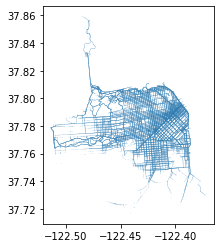

In [13]:
gdf.plot()

In [14]:
list(df["geometry"][0].centroid.coords)

[(-122.40209906997381, 37.771547820219496)]

In [15]:
# help(df["geometry"][0].centroid.coords)

In [16]:
df['coords'] = df['geometry'].apply(lambda x: x.centroid.coords[0])
df['lat'] = df['coords'].apply(lambda x: x[0])
df['long'] = df['coords'].apply(lambda x: x[1])

In [17]:
df['lat'].max(), df['lat'].min(), df['long'].max(), df['long'].min()

(-122.37198375504607,
 -122.51396101556965,
 37.85930537763746,
 37.716474144431984)

In [18]:
def cut_roi(df, l1 = -122.45, l2 = -122.43, o1 = 37.78, o2 = 37.80):
    rslt_df = df[df['lat'] > l1]
    rslt_df = rslt_df[rslt_df['lat'] < l2]
    rslt_df = rslt_df[rslt_df['long'] > o1]
    rslt_df = rslt_df[rslt_df['long'] < o2]
    return rslt_df

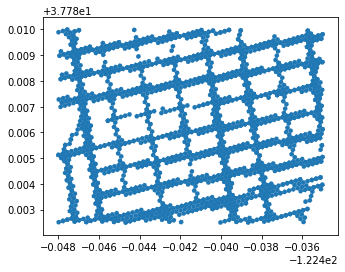

In [19]:
rslt_df = cut_roi(df, -122.448, -122.435, 37.7825, 37.7900)
# rslt_df = cut_roi(df)
rgdf = gpd.GeoDataFrame(rslt_df, crs='epsg:4326')
rgdf.plot()

In [20]:
max_lo = rslt_df['long'].max()
min_lo = rslt_df['long'].min()

max_la = rslt_df['lat'].max()
min_la = rslt_df['lat'].min()

la_shift = (max_la - min_la) / 8
lo_shift = (max_lo - min_lo) / 4.5
# la_shift = 1
# rslt_df['lat'].max(), rslt_df['lat'].min(), rslt_df['long'].max(), rslt_df['long'].min()
rslt_df['lat'].max() - rslt_df['lat'].min(), rslt_df['long'].max() - rslt_df['long'].min()

(0.012985643688693926, 0.007490236209307)

In [21]:
def find_new_lat(row):
    new_lat = row.lat - ((max_lo - row.long) / (max_lo - min_lo)) * la_shift
    return new_lat

def find_new_long(row):
    new_long = row.long + ((max_la - row.lat) / (max_la - min_la)) * lo_shift
    return new_long

rslt_df['new_lat'] = rslt_df.apply(find_new_lat, axis=1)
rslt_df['new_long'] = rslt_df.apply(find_new_long, axis=1)

In [22]:
rslt_df

,hexid,dayType,traversals,geometry,coords,lat,long,new_lat,new_long
627,8c28308292a21ff,weekday,113,"POLYGON ((-122.44729 37.78949, -122.44720 37.7...","(-122.4473191917017, 37.78958494961544)",-122.447319,37.789585,-122.447407,37.791164
628,8c28308292a2dff,weekday,90,"POLYGON ((-122.44714 37.78937, -122.44705 37.7...","(-122.44716877195695, 37.789465830628664)",-122.447169,37.789466,-122.447283,37.791026
629,8c28308292a67ff,weekday,118,"POLYGON ((-122.44720 37.78920, -122.44711 37.7...","(-122.44723047020938, 37.78929777994663)",-122.447230,37.789298,-122.447381,37.790865
630,8c28308292a61ff,weekday,185,"POLYGON ((-122.44726 37.78903, -122.44717 37.7...","(-122.44729216823747, 37.78912972907888)",-122.447292,37.789130,-122.447479,37.790705
631,8c28308292a6dff,weekday,179,"POLYGON ((-122.44711 37.78891, -122.44702 37.7...","(-122.44714174915633, 37.78901060940139)",-122.447142,37.789011,-122.447354,37.790567
...,...,...,...,...,...,...,...,...,...
99434,8c283082954c3ff,weekend,16,"POLYGON ((-122.43756 37.78373, -122.43747 37.7...","(-122.43758852996196, 37.78383044720743)",-122.437589,37.783830,-122.438924,37.784162
99494,8c2830829084dff,weekend,18,"POLYGON ((-122.43980 37.78399, -122.43970 37.7...","(-122.43982543776768, 37.78408374119619)",-122.439825,37.784084,-122.441106,37.784702
99563,8c283082970edff,weekend,23,"POLYGON ((-122.44055 37.78827, -122.44046 37.7...","(-122.44058132455773, 37.78837028930748)",-122.440581,37.788370,-122.440933,37.789086
99715,8c283082939e5ff,weekend,31,"POLYGON ((-122.44600 37.78825, -122.44591 37.7...","(-122.44602712124724, 37.788344811902626)",-122.446027,37.788345,-122.446384,37.789758


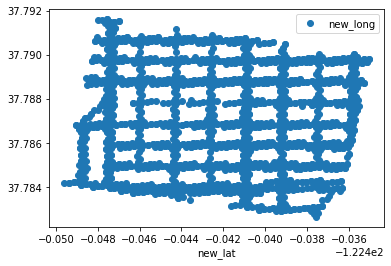

In [23]:
rslt_df.plot(x='new_lat', y='new_long', style='o')

In [24]:
def cut_roi_new(df, l1 = -122.45, l2 = -122.43, o1 = 37.78, o2 = 37.80):
    rslt_df = copy.deepcopy(df)
    rslt_df = rslt_df[rslt_df['new_lat'] > l1]
    rslt_df = rslt_df[rslt_df['new_lat'] < l2]
    rslt_df = rslt_df[rslt_df['new_long'] > o1]
    rslt_df = rslt_df[rslt_df['new_long'] < o2]
    return rslt_df

In [25]:
new_max_lo = rslt_df['new_long'].max()
new_min_lo = rslt_df['new_long'].min()

new_max_la = rslt_df['new_lat'].max()
new_min_la = rslt_df['new_lat'].min()

lo_cut = (new_max_lo - new_min_lo) / 10
la_cut = (new_max_la - new_min_la) / 10
new_max_lo, new_min_lo, new_max_la, new_min_la

(37.79160089991515,
 37.78263951139149,
 -122.43504335115018,
 -122.44959524396128)

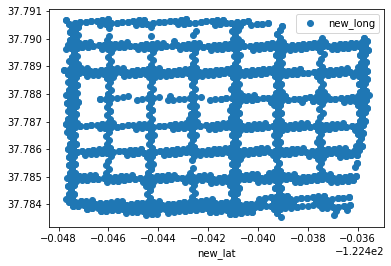

In [26]:
rslt_df1 = cut_roi_new(rslt_df, new_min_la + la_cut + la_cut / 4, new_max_la - la_cut + la_cut / 1.5, new_min_lo + lo_cut, new_max_lo - lo_cut)
# print(rslt_df)
rslt_df1.plot(x='new_lat', y='new_long', style='o')

In [27]:
len(rslt_df1)

1861

In [28]:
N = GRID_SIZE

In [29]:
new_max_lo = rslt_df1['new_long'].max()
new_min_lo = rslt_df1['new_long'].min()

new_max_la = rslt_df1['new_lat'].max()
new_min_la = rslt_df1['new_lat'].min()

lo_cut = (new_max_lo - new_min_lo)
la_cut = (new_max_la - new_min_la)
new_max_lo, new_min_lo, new_max_la, new_min_la

(37.790703090684545,
 37.78354331970747,
 -122.4355528247206,
 -122.44776537972459)

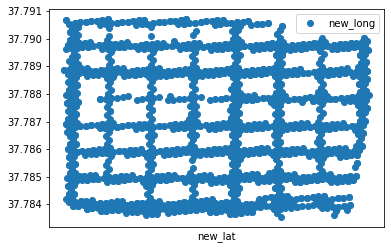

In [30]:
# rslt_df1.plot(x="new_lat", y=["new_long", "long"], style='o', grid=True)
ax = rslt_df1.plot(x="new_lat", y="new_long", style='o', xticks = [])
# ax.xaxis.grid(True, which='minor', linestyle='-', linewidth=0.25)
# ax.grid('on', which='minor', axis='x' )
ax.grid('off', which='major', axis='x', linewidth=2)

In [31]:
new_max_la, new_min_la

(-122.4355528247206, -122.44776537972459)

In [32]:
xdiff = (new_max_la - new_min_la) / GRID_SIZE
ydiff = (new_max_lo - new_min_lo) / GRID_SIZE

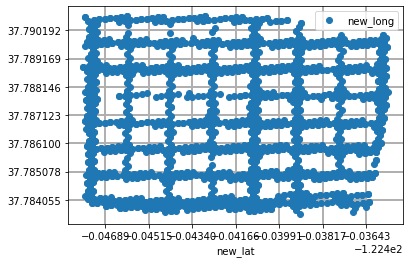

In [33]:
xticks = []
yticks = []
for i in range(1, GRID_SIZE + 1):
    xticks.append(new_min_la + i * xdiff - xdiff / 2)
    yticks.append(new_min_lo + i * ydiff - ydiff / 2)
ax = rslt_df1.plot(x="new_lat", y="new_long", style='o', xticks = xticks, yticks = yticks)
ax.grid('off', which='major', axis='x', linewidth=2)
ax.grid('off', which='major', axis='y', linewidth=2)

In [43]:
new_min_la, new_min_la + xdiff*7, new_max_la

(-122.44776537972459, -122.4355528247206, -122.4355528247206)

In [72]:
la_list = [new_min_la + i * xdiff for i in range(GRID_SIZE + 1)]
la_list, new_max_la

([-122.44776537972459,
  -122.44602072900973,
  -122.44427607829488,
  -122.44253142758002,
  -122.44078677686517,
  -122.43904212615031,
  -122.43729747543546,
  -122.4355528247206],
 -122.4355528247206)

In [73]:
lo_list = [new_min_lo + i * ydiff for i in range(GRID_SIZE + 1)]
lo_list, new_max_lo

([37.78354331970747,
  37.78456614413277,
  37.78558896855806,
  37.78661179298336,
  37.787634617408656,
  37.788657441833955,
  37.789680266259246,
  37.790703090684545],
 37.790703090684545)

In [98]:
def get_index_from_list_and_coord(my_list, coord):
#     print(coord)
#     print(my_list)
    try:
        index = next(i for i, value in enumerate(my_list) if value >= coord)
    except:
        return -1
    
    if index == 0:
        return -1
    
    return index - 1

def get_block_of_mat_for_coord(la, lo, la_list = la_list, lo_list = lo_list):
    vert = get_index_from_list_and_coord(lo_list, lo)
    horz = get_index_from_list_and_coord(la_list, la)
    
    return (vert, horz)

In [99]:
traffic_mat = np.zeros(shape = (GRID_SIZE, GRID_SIZE), dtype = np.uint16)

for ind in rslt_df.index:
    la = rslt_df['new_lat'][ind]
    lo = rslt_df['new_long'][ind]
#     print(la, lo)
    vert, horz = get_block_of_mat_for_coord(la, lo)
    if vert == -1 or horz == -1:
        continue
#     print(vert, horz)
    traffic_mat[vert][horz] += rslt_df["traversals"][ind]
    
#     break

In [100]:
traffic_mat

array([[2070, 1607, 1013, 2529, 1793,  800,  587],
       [2231, 1565, 1392, 2300, 2937, 2516, 1974],
       [1750, 1201, 1473, 2535, 3095, 2391, 4086],
       [2126,  790, 1108, 1931, 1612, 1003, 4398],
       [1939,  536,  670, 1118, 1283,  822, 3921],
       [2966, 1512, 1704, 1811, 1939, 1667, 4611],
       [3700, 2665, 2503, 3366, 2387, 1378, 2548]], dtype=uint16)

In [102]:
np.save("traffic_mat.npy", traffic_mat)

In [105]:
traffic_mat.min(), traffic_mat.max()

(536, 4611)